## Music genre classifier
- normalizovat data 
- dorobit vizualizacie pre features
- feature engineering
- doplnit tokenizovany text do features listu,
- skusit ine klasifikatory(random forest)
- grid search
- hrat sa s jednotlivymi triedami
- dokumentacia
- confusion_matrix pre vysledky


## Sprava 1
- oseknut na 5000 pre kazdy zaner

In [7]:
import pandas as pd
import numpy as np

import os
from os import path
from os import getcwd

from matplotlib import pyplot as plt
import seaborn as sb

import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import nltk
from nltk.corpus import stopwords

import io
from scipy import misc
import pydotplus
import graphviz

import warnings

#nltk.download()
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

### Data processing
- load data
- erase unimportant column
- show genre distribution
- print genres
- balance genre distribution

C:\Users\jakub\Desktop\MichalKodiDodzaleny\..\msd_genre_dataset.txt
['classic pop and rock' 'punk' 'folk' 'pop' 'dance and electronica'
 'metal' 'jazz and blues' 'classical' 'hip-hop' 'soul and reggae']


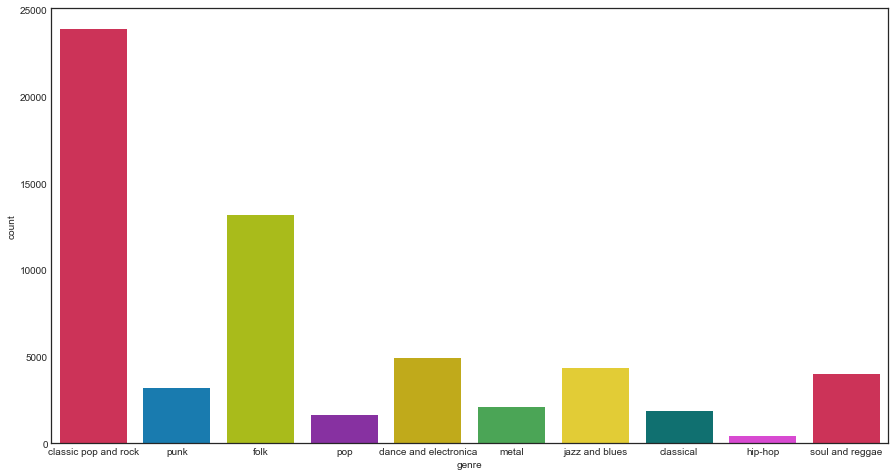

In [93]:
data_filename = path.join(getcwd(), '..', 'msd_genre_dataset.txt')
print(data_filename)
pandas_data = pd.read_csv(data_filename, header=0)
del pandas_data['track_id']
pandas_data.rename(columns={'%genre': 'genre'}, inplace=True)

red_blue = ['#e6194b', '#0082c8','#bdd600','#911eb4', '#dbbe00', '#3cb44b','#ffe119','#008080', '#f032e6']
palette = sb.color_palette(red_blue)
sb.set_palette(palette)
sb.set_style('white')
fig = plt.figure(figsize=(15,8))
sb.countplot(x="genre", data=pandas_data, palette=red_blue)

genre_column = pandas_data['genre']
print(genre_column.unique())

#len(pandas_data[(pandas_data['%genre'] == 'dance and electronica')])

In [94]:
poprock = sklearn.utils.shuffle(pandas_data[pandas_data['genre'] == 'classic pop and rock'])
folk = sklearn.utils.shuffle(pandas_data[pandas_data['genre'] == 'folk'])

poprock = poprock[:int(5000)]
folk = folk[:int(5000)]

pandas_data = pandas_data.drop(pandas_data[pandas_data['genre'] == 'classic pop and rock'].index)
pandas_data = pandas_data.drop(pandas_data[pandas_data['genre'] == 'folk'].index)

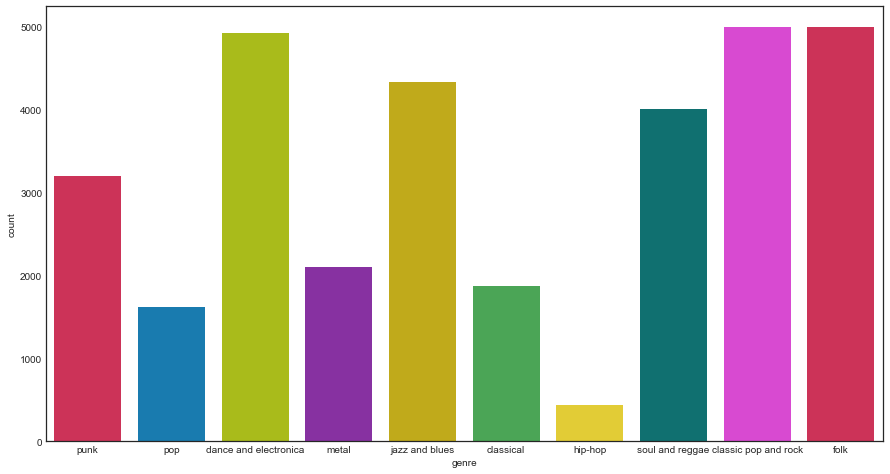

In [95]:
frames = [pandas_data, poprock, folk]
df = pd.concat(frames)

fig = plt.figure(figsize=(15,8))
sb.countplot(x="genre", data=df, palette=red_blue)

### Features adjusment
- tokenize and remove stop words from title
- tokenize and remove stop words from artist name

In [96]:
df['tokenized_title'] = df.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
df['tokenized_artist_name'] = df.apply(lambda row: nltk.word_tokenize(row['artist_name']), axis=1)
stop_words = stopwords.words('english')

#for i,row in pandas_data.iterrows():
#    print(row.tokenized_title)
#    row.tokenized_title = [word for word in row.tokenized_title if not word.lower() in stop_words and word.isalpha()]
#    print(row.tokenized_title)

def removeStopWors(words):
    out = [word for word in words if not word.lower() in stop_words and word.isalpha()]
    return out

df['tokenized_title'] = df.apply(lambda row: removeStopWors(row['tokenized_title']), axis=1)
df['tokenized_artist_name'] = df.apply(lambda row: removeStopWors(row['tokenized_artist_name']), axis=1)

df

,genre,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,...,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12,tokenized_title,tokenized_artist_name
23895,punk,Gaz Nevada,I C Love Affair,-11.692,215.680,4,7,1,390.21669,37.407679,...,1438.709380,1409.052050,469.471179,701.122890,205.498069,416.394306,308.376192,205.342829,"[C, Love, Affair]","[Gaz, Nevada]"
23896,punk,Close Combat,Pieke,-8.465,181.727,4,2,1,222.01424,47.481769,...,744.527096,576.282914,312.065861,341.816107,438.786829,217.185562,172.488676,107.900188,[Pieke],"[Close, Combat]"
23897,punk,Close Combat,One Goal,-9.802,143.258,1,7,1,234.97098,45.215285,...,875.340084,479.630136,367.788692,315.335050,383.704213,198.750683,147.167370,132.249188,"[One, Goal]","[Close, Combat]"
23898,punk,Close Combat,Skinhead Pride,-10.002,198.678,4,9,1,171.12771,45.416330,...,693.201666,643.482582,323.476615,284.213170,266.876326,173.105332,199.876823,142.242248,"[Skinhead, Pride]","[Close, Combat]"
23899,punk,Close Combat,Guest Of The State,-9.782,197.259,4,7,1,168.80281,45.392111,...,781.728128,582.849445,374.209090,263.218574,396.554976,211.750683,196.885589,177.964331,"[Guest, State]","[Close, Combat]"
23900,punk,Close Combat,I Just Wanna Get Drunk,-9.001,99.516,4,7,1,141.84444,45.980448,...,1104.530120,396.024525,404.831204,380.504331,435.906053,200.452407,102.594547,179.817923,"[Wan, na, Get, Drunk]","[Close, Combat]"
23901,punk,Close Combat,When We Were Young,-9.845,103.535,1,0,1,229.95546,46.363056,...,878.878205,422.782637,260.954550,323.685765,227.633381,170.370843,138.298570,155.811867,[Young],"[Close, Combat]"
23902,punk,Close Combat,On Parole,-10.516,106.755,4,7,1,197.64200,45.386020,...,842.941833,502.959382,226.504481,240.647197,306.873210,155.070619,155.273895,97.041183,[Parole],"[Close, Combat]"
23903,punk,Close Combat,M.V.V.,-8.355,90.911,4,0,1,158.66730,47.046759,...,644.978936,863.213108,338.775577,346.809578,424.969079,251.385997,296.520915,137.544830,[],"[Close, Combat]"
23904,punk,Close Combat,Gebore En Getoge,-9.401,181.812,4,7,1,187.74159,47.602056,...,411.392892,301.648640,213.229400,236.726622,446.394200,180.907584,139.388226,218.101898,"[Gebore, En, Getoge]","[Close, Combat]"


In [99]:
df.describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,...,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000
mean,-11.551655,122.869093,3.524805,5.261403,0.667272,262.736770,41.099366,-7.544125,6.805724,1.573722,...,2208.524013,1660.347443,950.878201,937.293324,659.020642,531.594119,424.841188,334.282963,302.888405,324.523673
std,6.112613,36.546775,1.294344,3.592139,0.471197,143.168941,7.171148,57.622996,39.273846,17.699679,...,1406.577469,1143.092808,494.828699,605.578421,352.118707,313.985435,240.929259,170.476389,189.753301,190.387539
min,-48.057000,0.000000,0.000000,0.000000,0.000000,0.809340,7.838571,-318.656281,-257.525596,-120.723153,...,95.505318,110.570448,50.263681,37.403374,60.896276,36.801235,33.611425,21.861296,20.006805,21.180689
25%,-14.404000,96.593000,3.000000,2.000000,0.000000,184.972610,37.265415,-39.615390,-16.345453,-8.977226,...,1250.261522,930.462910,628.022502,522.638213,427.638741,327.090156,275.651295,219.073344,178.863056,215.815390
50%,-10.217000,120.131000,4.000000,5.000000,1.000000,235.963630,42.241777,-0.013785,8.079946,-0.123345,...,1922.179868,1396.867439,853.125923,797.344361,598.978292,461.633425,373.732861,302.610610,258.334676,290.931842
75%,-7.106000,144.073000,4.000000,9.000000,1.000000,305.893420,46.250420,32.306265,29.852886,10.241908,...,2808.737344,2049.857096,1156.343923,1184.952145,812.153885,649.203915,510.144526,410.665714,373.633221,385.592207
max,2.865000,260.547000,7.000000,11.000000,1.000000,2873.808530,58.011152,448.373214,292.952706,197.754968,...,20131.148234,17007.134106,16049.083490,8278.809040,8044.771043,5355.204760,4951.739559,2707.802218,4780.290858,9599.902501


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32513 entries, 23895 to 29065
Data columns (total 35 columns):
genre                    32513 non-null object
artist_name              32513 non-null object
title                    32513 non-null object
loudness                 32513 non-null float64
tempo                    32513 non-null float64
time_signature           32513 non-null int64
key                      32513 non-null int64
mode                     32513 non-null int64
duration                 32513 non-null float64
avg_timbre1              32513 non-null float64
avg_timbre2              32513 non-null float64
avg_timbre3              32513 non-null float64
avg_timbre4              32513 non-null float64
avg_timbre5              32513 non-null float64
avg_timbre6              32513 non-null float64
avg_timbre7              32513 non-null float64
avg_timbre8              32513 non-null float64
avg_timbre9              32513 non-null float64
avg_timbre10             32513 n

### Data Visualisation
- visualise data by histogram and boxplot

In [161]:
classical = df[df['genre'] == 'classical']
dance = df[df['genre'] == 'dance and electronica']
folk = df[df['genre'] == 'folk']
hiphop = df[df['genre'] == 'hip-hop']
jazz = df[df['genre'] == 'jazz and blues']
metal = df[df['genre'] == 'metal']
pop = df[df['genre'] == 'pop']
poprock = df[df['genre'] == 'classic pop and rock']
punk = df[df['genre'] == 'punk']
reggae = df[df['genre'] == 'soul and reggae']

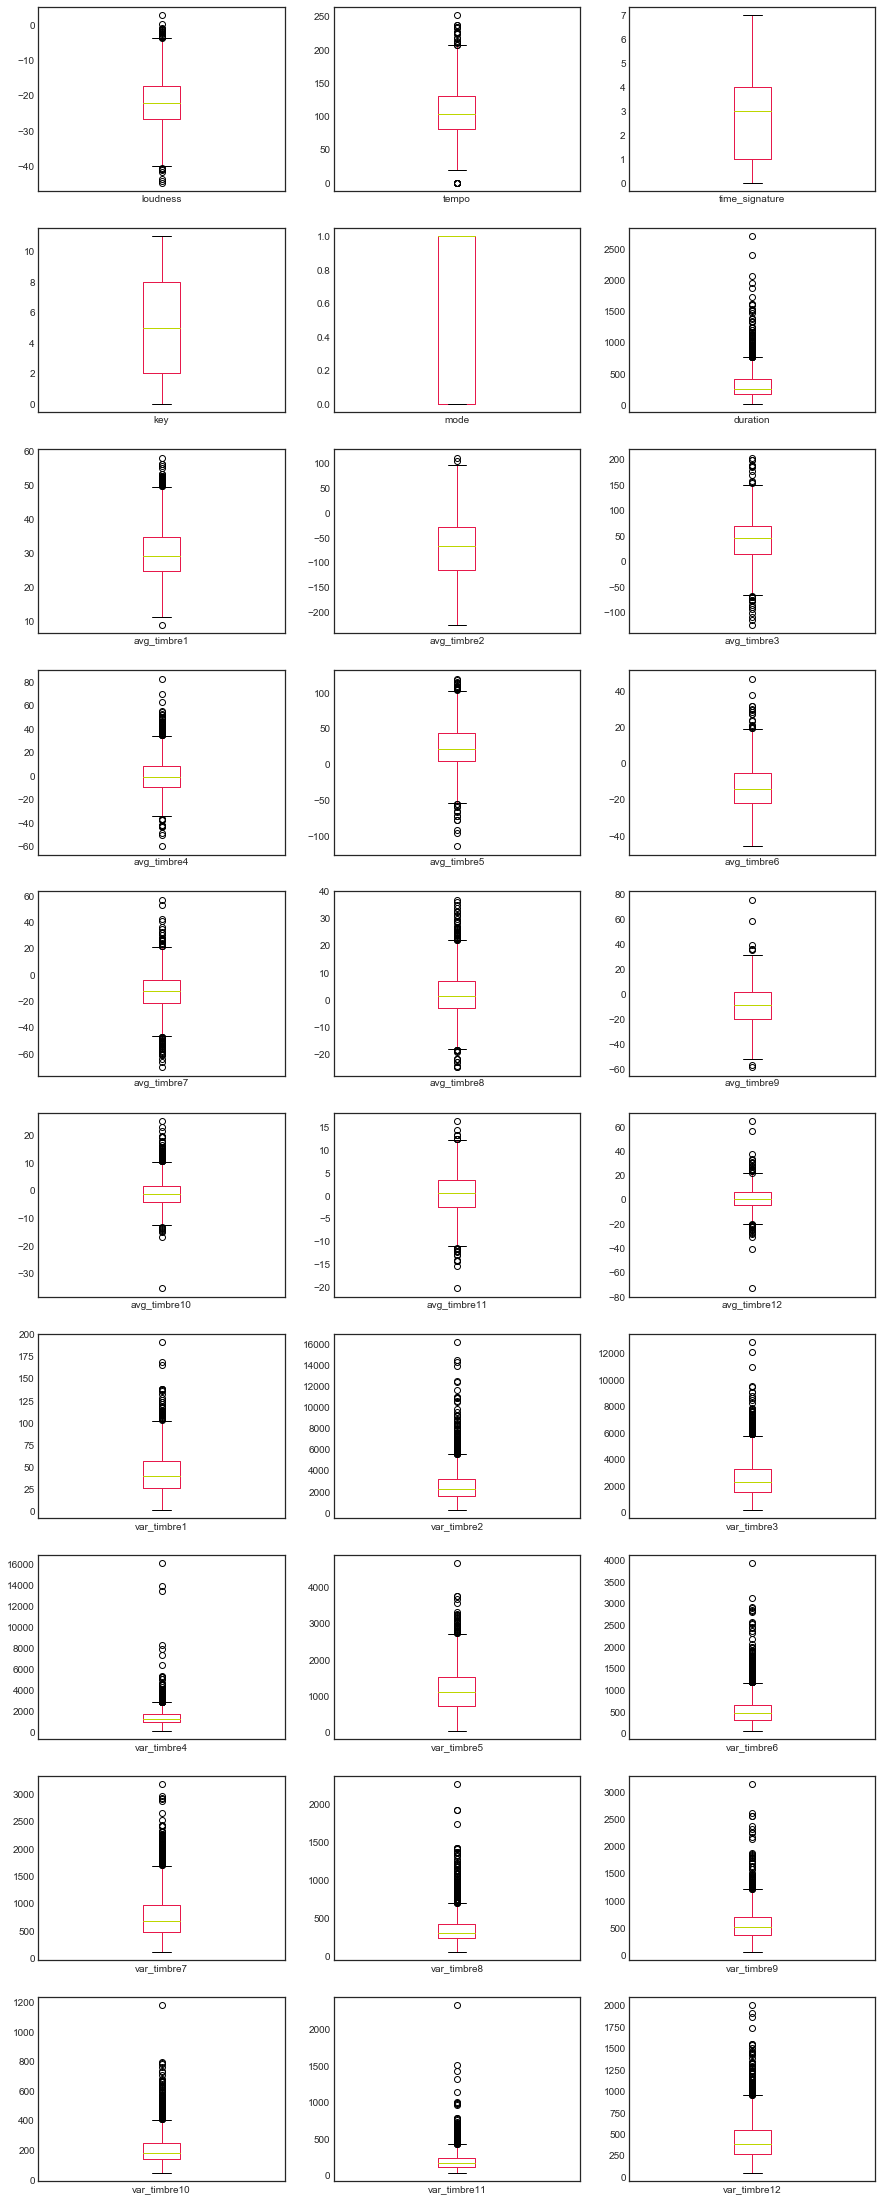

In [124]:
classical.plot(kind='box', subplots=True, layout=(10,3), sharex=False, sharey=False, figsize=(15, 40))
plt.show()

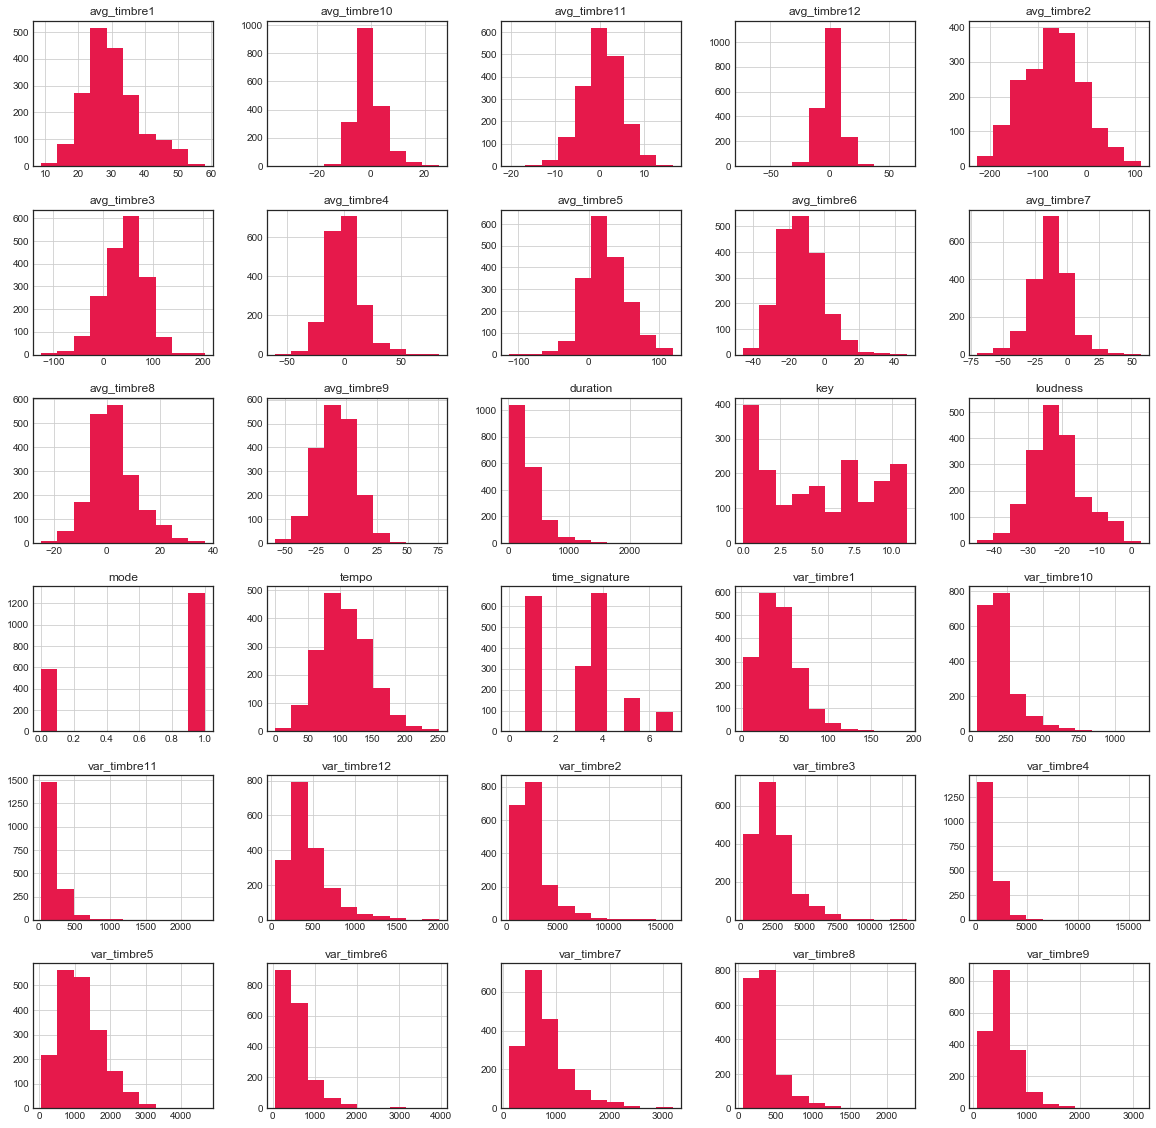

In [148]:
classical.hist()
plt.show()

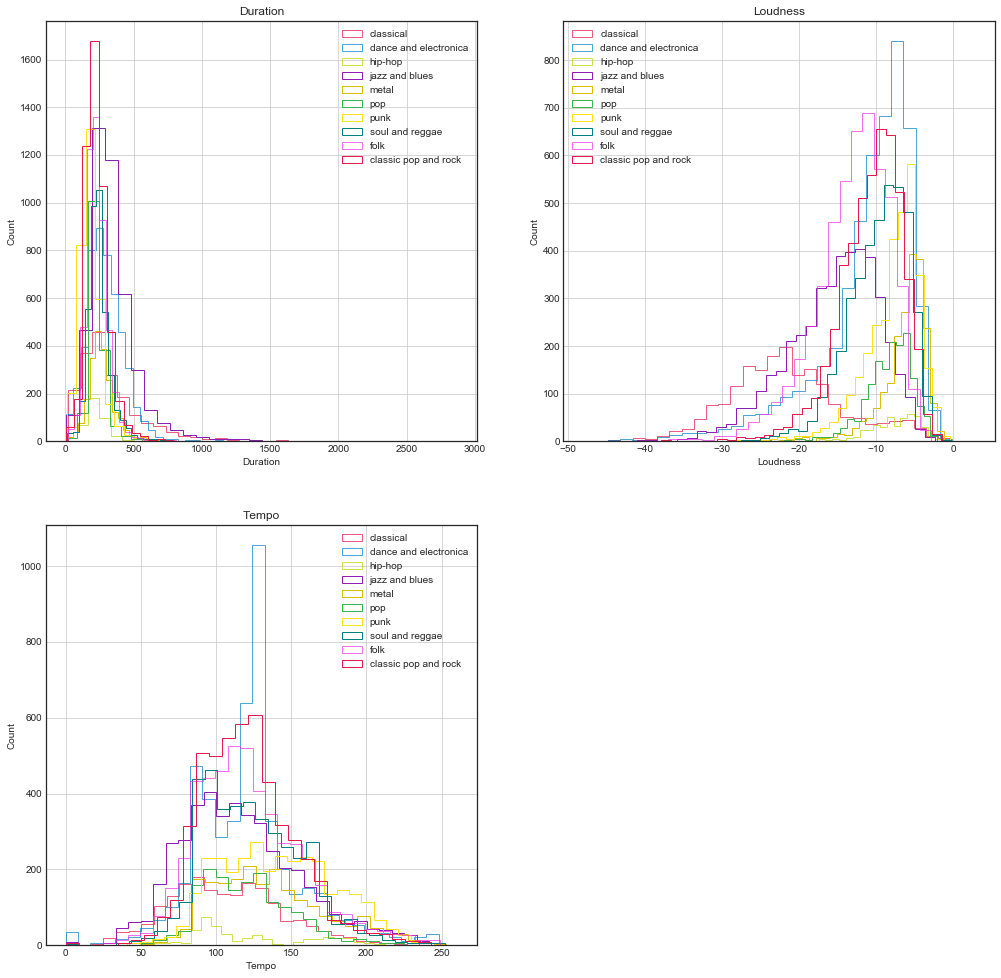

In [166]:
fig2 = plt.figure(figsize=(17, 17))

#Duration 
ax1 = fig2.add_subplot(221)
ax1.set_xlabel('Duration')
ax1.set_ylabel('Count')
ax1.set_title('Duration')
classical['duration'].hist(alpha=0.7, bins = 30, label='classical',histtype='step')
dance['duration'].hist(alpha=0.7, bins = 30, label='dance and electronica',histtype='step')
hiphop['duration'].hist(alpha=0.7, bins = 30, label='hip-hop',histtype='step')
jazz['duration'].hist(alpha=1, bins = 30, label='jazz and blues',histtype='step')
metal['duration'].hist(alpha=1, bins = 30, label='metal',histtype='step')
pop['duration'].hist(alpha=1, bins = 30, label='pop',histtype='step')
punk['duration'].hist(alpha=1, bins = 30, label='punk',histtype='step')
reggae['duration'].hist(alpha=1, bins = 30, label='soul and reggae',histtype='step')
folk['duration'].hist(alpha=0.7, bins = 30, label='folk',histtype='step')
poprock['duration'].hist(alpha=1, bins = 30, label='classic pop and rock',histtype='step')
plt.legend(loc = "upper right")

#Loudness
ax2 = fig2.add_subplot(222)
ax2.set_xlabel('Loudness')
ax2.set_ylabel('Count')
ax2.set_title('Loudness')
classical['loudness'].hist(alpha=0.7, bins = 30, label='classical',histtype='step')
dance['loudness'].hist(alpha=0.7, bins = 30, label='dance and electronica',histtype='step')
hiphop['loudness'].hist(alpha=0.7, bins = 30, label='hip-hop',histtype='step')
jazz['loudness'].hist(alpha=1, bins = 30, label='jazz and blues',histtype='step')
metal['loudness'].hist(alpha=1, bins = 30, label='metal',histtype='step')
pop['loudness'].hist(alpha=1, bins = 30, label='pop',histtype='step')
punk['loudness'].hist(alpha=1, bins = 30, label='punk',histtype='step')
reggae['loudness'].hist(alpha=1, bins = 30, label='soul and reggae',histtype='step')
folk['loudness'].hist(alpha=0.7, bins = 30, label='folk',histtype='step')
poprock['loudness'].hist(alpha=1, bins = 30, label='classic pop and rock',histtype='step')
plt.legend(loc = "upper left")

#Tempo
ax3 = fig2.add_subplot(223)
ax3.set_xlabel('Tempo')
ax3.set_ylabel('Count')
ax3.set_title('Tempo')
classical['tempo'].hist(alpha=0.7, bins = 30, label='classical',histtype='step')
dance['tempo'].hist(alpha=0.7, bins = 30, label='dance and electronica',histtype='step')
hiphop['tempo'].hist(alpha=0.7, bins = 30, label='hip-hop',histtype='step')
jazz['tempo'].hist(alpha=1, bins = 30, label='jazz and blues',histtype='step')
metal['tempo'].hist(alpha=1, bins = 30, label='metal',histtype='step')
pop['tempo'].hist(alpha=1, bins = 30, label='pop',histtype='step')
punk['tempo'].hist(alpha=1, bins = 30, label='punk',histtype='step')
reggae['tempo'].hist(alpha=1, bins = 30, label='soul and reggae',histtype='step')
folk['tempo'].hist(alpha=0.7, bins = 30, label='folk',histtype='step')
poprock['tempo'].hist(alpha=1, bins = 30, label='classic pop and rock',histtype='step')
plt.legend(loc = "upper right")



### Training 
- split dataset
- trian tree
- show tree
- evaluate 

In [149]:
df = sklearn.utils.shuffle(df)

test_df = df[:int(len(df)*0.2)]
train_df = df[int(len(df)*0.2):]

print(len(train_df))
print(len(test_df))

26011
6502


In [150]:
c = DecisionTreeClassifier(min_samples_split=100)

In [151]:
features = ['loudness', 'tempo', 'time_signature', 'key', 'mode', 'duration', 'avg_timbre1',
           'avg_timbre1','avg_timbre2','avg_timbre3','avg_timbre4','avg_timbre5','avg_timbre6',
           'avg_timbre9','avg_timbre8','avg_timbre9','avg_timbre10','avg_timbre11','avg_timbre12',
           'var_timbre1','var_timbre2','var_timbre3','var_timbre4','var_timbre5','var_timbre6',
           'var_timbre7','var_timbre8','var_timbre9','var_timbre10','var_timbre11','var_timbre12',]

In [152]:
x_train = train_df[features]
y_train = train_df['genre']

x_test = test_df[features]
y_test = test_df['genre']

dt = c.fit(x_train,y_train)

c:\users\jakub\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
c:\users\jakub\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:2509: DecompressionBombWarning: Image size (105181041 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


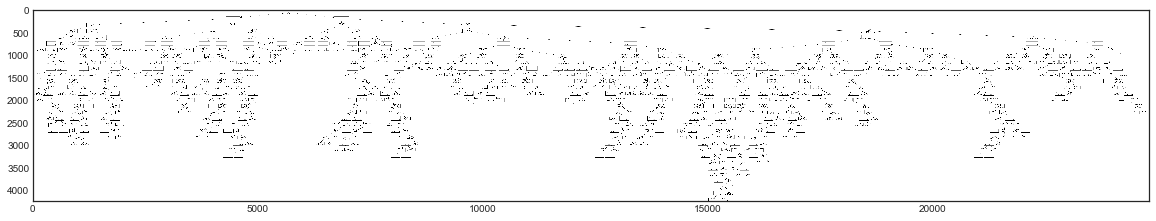

In [138]:
def printTree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

printTree(dt, features, 'tree01.png')

In [141]:
y_pred = c.predict(x_test)
score = accuracy_score(y_test, y_pred)*100

print(score)
print(f1_score(y_test, y_pred, average=None)*100)



12.303906490310673
[ 0.         48.81025015  0.          0.          0.          0.
  0.          0.        ]


c:\users\jakub\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\jakub\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
